# Week7 - Tree Assignment

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data 
- create a training and test set with random_state = 3
- train a decision tree model on the training set.
- train a logistic regression model on the training set
- train a random forest model on the training set
- Which model performed better?
- Which features were most relevant in each model (a part from random forest)?
- Use grid search to improve performance on the best performed model

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [15]:
#Load the breast cancer dataset using datasets.load_breast_cancer()
data = load_breast_cancer()
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


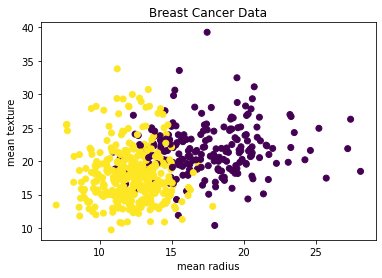

In [16]:
#Creating a scatter plot to visualize the features
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=data['target'])
plt.xlabel(data['feature_names'][0])
plt.ylabel(data['feature_names'][1])
plt.title("Breast Cancer Data")
plt.show()

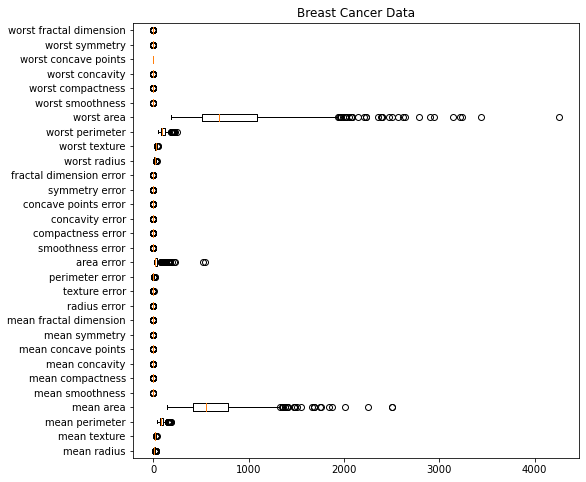

In [17]:
#Creating box plot for the data
fig, ax = plt.subplots(figsize=(8,8))
ax.boxplot(df, vert=False)
ax.set_yticklabels(data['feature_names'])
ax.set_title("Breast Cancer Data")
plt.show()

In [11]:
#Create a training and test set with random_state = 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state=3)

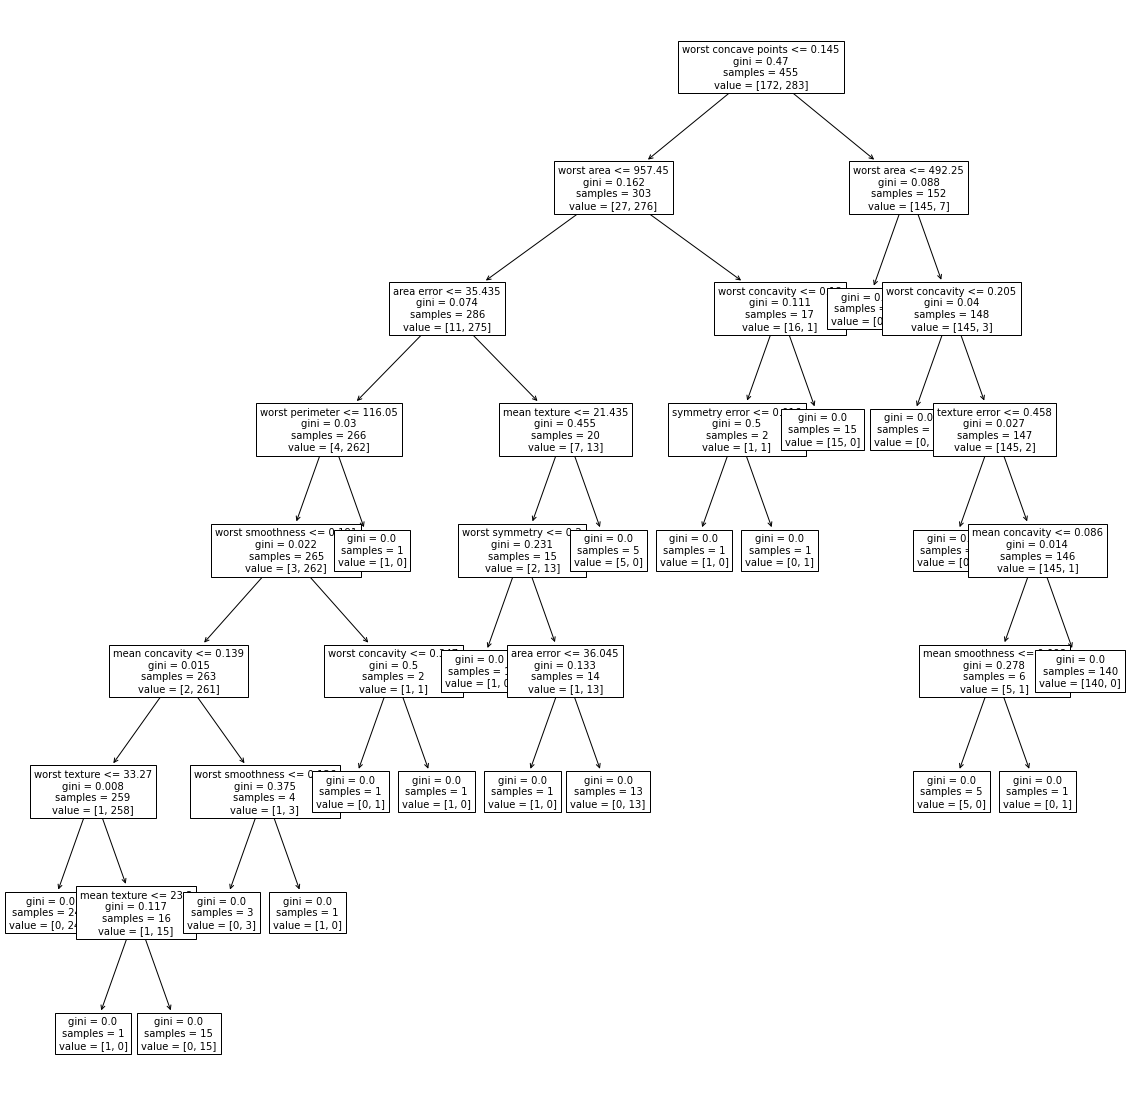

In [19]:
#Train a decision tree model on the training set.
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=3)
tree_model.fit(X_train, y_train)

from sklearn import tree

plt.figure(figsize=(20,20))
tree.plot_tree(tree_model, feature_names=data['feature_names'], fontsize=10)
plt.show()

In [20]:
dt = DecisionTreeClassifier(random_state=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [21]:
dt.score(X_test,y_test)

0.8947368421052632

In [25]:
#Train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=3)
lg.fit(X_train, y_train)

C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=3)

In [26]:
lg.score(X_test,y_test)

0.9122807017543859

In [24]:
#Train a Random Forest model on the training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.9385964912280702

By observing the above data of accuracy we can conclude that random forest model has performed better with 93 percent accuracy score.

In [30]:
#Display the most relavent features in decsion tree and logistic regression models
for i,j in zip(data['feature_names'], dt.feature_importances_):
    print(i, ":", j)

mean radius : 0.0
mean texture : 0.03509215698359219
mean perimeter : 0.0
mean area : 0.0
mean smoothness : 0.007789601994138112
mean compactness : 0.0
mean concavity : 0.0037247000501821463
mean concave points : 0.0
mean symmetry : 0.0
mean fractal dimension : 0.0
radius error : 0.0
texture error : 0.009157192168115948
perimeter error : 0.0
area error : 0.028188808058440224
smoothness error : 0.0
compactness error : 0.0
concavity error : 0.0
concave points error : 0.0
symmetry error : 0.0046737611964828675
fractal dimension error : 0.0
worst radius : 0.0
worst texture : 0.0005481293295103351
worst perimeter : 0.009102728431589437
worst area : 0.15717300153926556
worst smoothness : 0.011509107607498096
worst compactness : 0.0
worst concavity : 0.017831114462562296
worst concave points : 0.7076871682528552
worst symmetry : 0.007522529925767663
worst fractal dimension : 0.0


In [36]:
for a, b in zip(data['feature_names'], lg.coef_[0]):
    print(a, ":", b)

mean radius : 0.6798562036709027
mean texture : 0.6341343048915281
mean perimeter : 0.4765943169362132
mean area : -0.027018809111914104
mean smoothness : -0.025312355415433658
mean compactness : -0.11418841838596505
mean concavity : -0.16301685880474195
mean concave points : -0.06467797000764453
mean symmetry : -0.046222921491531954
mean fractal dimension : -0.007911434193086962
radius error : 0.02104361223615442
texture error : 0.15483636900725764
perimeter error : 0.046589496518118514
area error : -0.12474214733805612
smoothness error : -0.002061134872435346
compactness error : -0.024063780023871443
concavity error : -0.033380026934010404
concave points error : -0.007627833795666212
symmetry error : -0.010736813815509727
fractal dimension error : -0.001964944293220835
worst radius : 0.6697118094321789
worst texture : -0.6368779255422429
worst perimeter : -0.2777691560098588
worst area : -0.01163233975523729
worst smoothness : -0.047937028013693816
worst compactness : -0.368358937247

In [34]:
#Create a grid search for the random forest model
from sklearn.model_selection import GridSearchCV
random_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
grids = GridSearchCV(rf, param_grid=random_grid, cv=5)
grids.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]})

In [38]:
grids.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}